In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, 'grid.color': 'lightgray', 'axes.grid': True, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

from survivors import metrics as metr
from survivors import constants as cnt
from survivors import criteria as crit
import survivors.datasets as ds

import warnings
warnings.filterwarnings("ignore")

In [5]:
X, y, feat, categ, _ = ds.load_backblaze_2016_2018(threshold=0.99)

In [7]:
X

,capacity_bytes,model,smart_10_normalized,smart_10_raw,smart_11_normalized,smart_11_raw,smart_12_normalized,smart_12_raw,smart_183_normalized,smart_183_raw,...,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_8_normalized,smart_8_raw,smart_9_normalized,smart_9_raw
0,4.000787e+12,0,100.0,0.0,NaN,NaN,100.0,3.0,97.0,3.0,...,100.0,3.0,100.0,0.0,87.0,568211539.0,NaN,NaN,84.0,14334.0
1,3.000593e+12,1,100.0,0.0,NaN,NaN,100.0,18.0,NaN,NaN,...,100.0,18.0,100.0,0.0,100.0,0.0,121.0,34.0,98.0,16274.0
2,3.000593e+12,1,100.0,0.0,NaN,NaN,100.0,9.0,NaN,NaN,...,100.0,9.0,100.0,0.0,100.0,0.0,124.0,33.0,97.0,23525.0
3,3.000593e+12,1,100.0,0.0,NaN,NaN,100.0,21.0,NaN,NaN,...,100.0,22.0,100.0,0.0,100.0,0.0,124.0,33.0,97.0,22891.0
4,3.000593e+12,1,100.0,0.0,NaN,NaN,100.0,14.0,NaN,NaN,...,100.0,14.0,100.0,0.0,100.0,0.0,124.0,33.0,99.0,10135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37620,1.200014e+13,88,100.0,0.0,NaN,NaN,100.0,1.0,NaN,NaN,...,100.0,1.0,100.0,0.0,100.0,921165.0,NaN,NaN,100.0,7.0
37621,1.200014e+13,88,100.0,0.0,NaN,NaN,100.0,1.0,NaN,NaN,...,100.0,1.0,100.0,0.0,100.0,464.0,NaN,NaN,100.0,0.0
37622,1.200014e+13,88,100.0,0.0,NaN,NaN,100.0,3.0,NaN,NaN,...,100.0,3.0,100.0,0.0,63.0,1821216.0,NaN,NaN,100.0,313.0
37623,1.200014e+13,88,100.0,0.0,NaN,NaN,100.0,2.0,NaN,NaN,...,100.0,2.0,100.0,0.0,63.0,1978855.0,NaN,NaN,100.0,81.0


<Axes: xlabel='time', ylabel='Density'>

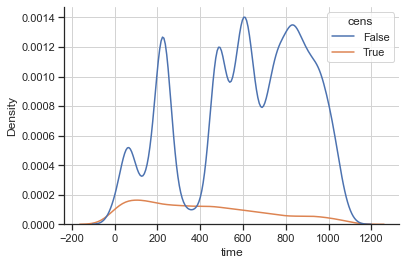

In [41]:
sns.kdeplot(pd.DataFrame(y), x="time", hue="cens")

In [13]:
df = pd.read_csv(r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020\smartlog_data_2017\smartlog_data_201707.csv")

In [16]:
df["dt"] = pd.to_datetime(df["dt"], format='%Y%m%d')

In [18]:
df.loc[df.groupby("serial_number")['dt'].idxmin()]

,Unnamed: 0,serial_number,manufacturer,model,smart_1_normalized,smart_1raw,smart_2_normalized,smart_2raw,smart_3_normalized,smart_3raw,...,smart_251raw,smart_252_normalized,smart_252raw,smart_253_normalized,smart_253raw,smart_254_normalized,smart_254raw,smart_255_normalized,smart_255raw,dt
439231,117229,disk_0,A,1,75.0,36922350.0,NaN,NaN,96.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
1061003,95000,disk_10,A,1,78.0,83633685.0,NaN,NaN,96.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
1061004,95001,disk_1000,A,1,66.0,4737867.0,NaN,NaN,96.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-12
392461,70459,disk_10000,A,1,78.0,73489666.0,NaN,NaN,96.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
91964,91964,disk_100007,A,1,80.0,117317462.0,NaN,NaN,94.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530269,47266,disk_99989,A,1,82.0,169365418.0,NaN,NaN,94.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
1084536,118533,disk_9999,A,1,74.0,29302258.0,NaN,NaN,96.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
26747,26747,disk_99991,A,1,74.0,25563473.0,NaN,NaN,93.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09
891170,86165,disk_99994,A,1,81.0,119401139.0,NaN,NaN,96.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-09


In [23]:
import os

main_dir = r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020"
for postfix in ["2017", "2018_Q1", "2018_Q2", "2018_Q3", "2018_Q4"]
    l_df = []
    dir_global = os.path.join(main_dir, f"smartlog_data_{postfix}")
    for filename in os.listdir(dir_global):
        full_filename = os.path.join(dir_global, filename)

        df = pd.read_csv(full_filename)
        df["dt"] = pd.to_datetime(df["dt"], format='%Y%m%d')
        l_df.append(df.loc[df.groupby("serial_number")['dt'].idxmin()])
        l_df.append(df.loc[df.groupby("serial_number")['dt'].idxmax()])
        del df
    df = pd.concat(l_df).reset_index()
    
    df = pd.concat([df.loc[df.groupby("serial_number")['dt'].idxmin()],
                df.loc[df.groupby("serial_number")['dt'].idxmax()]])
    df.to_csv(os.path.join(main_dir, f"Alibaba_{postfix}.csv.gz"), index=False, compression='gzip')

In [33]:
df = pd.concat(l_df).reset_index()

In [34]:
df = pd.concat([df.loc[df.groupby("serial_number")['dt'].idxmin()],
                df.loc[df.groupby("serial_number")['dt'].idxmax()]])

In [37]:
df["serial_number"].nunique() * 2

229328

In [51]:
df.to_csv(r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020\Alibaba_2017.csv.gz", index=False, compression='gzip')

In [38]:
df.groupby("serial_number")['dt'].transform(lambda x: x.max() - x.min())

0         175 days
388125    106 days
1         175 days
182064    151 days
2         172 days
            ...   
1232947   150 days
1232948   175 days
1232949   151 days
1232950   175 days
1232951   175 days
Name: dt, Length: 229328, dtype: timedelta64[ns]

In [ ]:
df["dt"]

In [44]:
df_target = pd.read_csv(r"D:\SurvivalAnalysis\TimeVarying\PAKDD2020\fault_tag_data.csv")

In [47]:
len(set(df_target["serial_number"].unique()) & set(df["serial_number"].unique()))

2219

In [49]:
len(df_target["serial_number"].unique())

2401